# **Deep Learning Final Project - Novozymes Enzyme Stability Prediction**
- Gautam Varma Datla (gvd6)

  Siddardha Varma Vegesna (sv92)
  
  Dhushyanth Polkampalli (dp822)


# **Understanding and accurately predicting protein stability is a fundamental problem in biotechnology.**

However, many enzymes are only marginally stable, which limits their performance under harsh application conditions. Instability also decreases the amount of protein that can be produced by the cell. Therefore, the development of efficient computational approaches to predict protein stability carries enormous technical and scientific interest. 

Enzymes are proteins that act as catalysts in the chemical reactions of living organisms. 

**The goal of this competition is to predict the thermostability of enzyme variants. So, we develop a model to predict/rank the thermostability of enzyme variants based on experimental melting temperature data, which is obtained from Novozymes’s high throughput screening lab**

 If successful, you'll help tackle the fundamental problem of improving protein stability, making the approach to design novel and useful proteins, like enzymes and therapeutics, more rapidly and at lower cost.

**Submission File**

Submissions are evaluated on the Spearman's correlation coefficient between the ground truth and the predictions.

Each **seq_id** represents a single-mutation variant of an enzyme.

 Your task is to rank the stability of these variants, assigning *greater ranks to more stable variants* For each seq_id in the test set, you must predict the value for for the target tm.

# **Loading the main train and test datasets**

In [ ]:
! mkdir train

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
! pip install -q kaggle

In [ ]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive"

In [ ]:
! kaggle competitions download -c novozymes-enzyme-stability-prediction

novozymes-enzyme-stability-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q novozymes-enzyme-stability-prediction.zip -d .

replace ./sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace ./test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace ./train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace ./train_updates_20220929.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace ./wildtype_structure_prediction_af2.pdb? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [ ]:
import pandas as pd 

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
train_data.shape

(31390, 5)

In [ ]:
test_data.shape

(2413, 4)

In [ ]:
train_data.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
train_data.describe()

,seq_id,pH,tm
count,31390.000000,31104.000000,31390.000000
mean,15694.500000,6.892339,49.147337
std,9061.656811,1.612225,14.010089
min,0.000000,1.990000,-1.000000
25%,7847.250000,7.000000,42.100000
50%,15694.500000,7.000000,48.000000
75%,23541.750000,7.000000,53.800000
max,31389.000000,64.900000,130.000000


In [ ]:
print("Length of protein sequence by index\n")
train_data["protein_sequence"].str.len().describe()

Length of protein sequence by index



count    31390.000000
mean       447.669513
std        640.728935
min          5.000000
25%        197.000000
50%        336.000000
75%        523.000000
max      32767.000000
Name: protein_sequence, dtype: float64

In [ ]:
print("The total number of unique data sources : \n")
len(train_data["data_source"].unique())

The total number of unique data sources : 



325

In [ ]:
train_data["pH"].unique()

array([ 7.  ,  5.  ,  7.5 ,   nan,  7.4 , 48.4 , 49.  , 55.6 ,  6.2 ,
        5.5 ,  6.3 ,  2.  ,  8.5 ,  3.  ,  6.8 ,  6.4 ,  6.6 ,  6.7 ,
        6.5 ,  4.5 ,  8.  ,  7.3 ,  7.2 ,  8.4 ,  8.1 ,  9.6 ,  5.9 ,
        6.  ,  4.  ,  3.5 ,  4.2 ,  5.1 ,  3.6 ,  7.1 ,  7.8 ,  9.  ,
        3.2 ,  2.5 ,  2.8 ,  5.2 ,  5.4 ,  5.8 ,  7.7 ,  7.6 , 10.  ,
        8.2 ,  2.7 ,  2.9 ,  3.1 , 64.9 ,  3.14,  2.53,  2.3 ,  2.2 ,
        2.81,  8.25,  9.9 ,  9.5 , 10.4 ,  9.08,  8.7 ,  3.7 , 39.  ,
        4.6 ,  4.4 ,  5.35,  5.7 ,  9.2 ,  5.38,  5.28,  6.9 ,  5.42,
        5.3 ,  6.1 ,  9.7 ,  8.6 ,  4.8 ,  6.78,  5.31,  3.02,  4.9 ,
        4.3 ,  5.45,  3.01,  3.3 ,  3.8 ,  2.4 ,  2.84,  2.34,  4.7 ,
        2.1 ,  3.9 ,  2.02,  2.83,  2.03,  2.86,  1.99,  8.3 , 53.4 ,
        3.16,  2.94,  9.75,  3.15,  3.07,  3.04,  3.25,  3.21,  2.98,
        3.19,  4.1 ,  5.6 ,  3.75,  4.75,  4.25, 11.  , 10.3 ])

# **Additional Data File: train_updates.csv**


As has been pointed out, there are some data issues in the training data. A file has been added to the Data page which contains the rows that should not be used due to data quality issues (2409 rows, with all features marked as NaN), as well as the rows where the pH and tm were transposed (25 rows, with corrected features in this dataset).

The original train.csv has not been modified. Please use this file to make adjustments as necessary.

In [ ]:
filter_df = pd.read_csv("train_updates_20220929.csv")

In [ ]:
missing_features = filter_df.isnull().all("columns")
indices_to_be_dropped = filter_df[missing_features].index
train_data = train_data.drop(index=indices_to_be_dropped)
indices_swap = filter_df[~missing_features].index
train_data.loc[indices_swap, ["pH", "tm"]] = filter_df.loc[indices_swap, ["pH", "tm"]]

In [ ]:
print(train_data.isnull().sum())

seq_id                 0
protein_sequence       0
pH                  2694
data_source         3347
tm                  2409
dtype: int64


In [ ]:
train_data['pH'] = train_data['pH'].fillna(train_data['pH'].mean())

In [ ]:
print(train_data.isnull().sum())

seq_id                 0
protein_sequence       0
pH                     0
data_source         3347
tm                  2409
dtype: int64


In [ ]:
train_data = train_data.dropna(subset=['tm'])

In [ ]:
print(train_data.isnull().sum())

seq_id                 0
protein_sequence       0
pH                     0
data_source         3221
tm                     0
dtype: int64


In [ ]:
train_data

,seq_id,protein_sequence,pH,data_source,tm
25,25,AAPDEITTAWPVNVGPLNPHLYTPNQMFAQSMVYEPLVKYQADGSV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
28,28,AARRFSGPRNQRQQGGGDPGLMHGKTVLITGANSGLGRATAAELLR...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
29,29,AASSPEADFVKKTISSHKIVIFSKSYCPYCKKAKSVFRELDQVPYV...,7.0,doi.org/10.1038/s41592-020-0801-4,49.0
30,30,AATFAYSQSQKRSSSSPGGGSNHGWNNWGKAAALASTTPLVHVASV...,5.5,doi.org/10.1038/s41592-020-0801-4,55.6
33,33,AAVLVTFIGGLYFITHHKKEESETLQSQKVTGNGLPPKPEERWRYI...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


# **Data Preprocessing**

In [ ]:
train_data.reset_index(inplace=True, drop=True)

In [ ]:
train_data.head()

,seq_id,protein_sequence,pH,data_source,tm
0,25,AAPDEITTAWPVNVGPLNPHLYTPNQMFAQSMVYEPLVKYQADGSV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
1,28,AARRFSGPRNQRQQGGGDPGLMHGKTVLITGANSGLGRATAAELLR...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
2,29,AASSPEADFVKKTISSHKIVIFSKSYCPYCKKAKSVFRELDQVPYV...,7.0,doi.org/10.1038/s41592-020-0801-4,49.0
3,30,AATFAYSQSQKRSSSSPGGGSNHGWNNWGKAAALASTTPLVHVASV...,5.5,doi.org/10.1038/s41592-020-0801-4,55.6
4,33,AAVLVTFIGGLYFITHHKKEESETLQSQKVTGNGLPPKPEERWRYI...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4


# **We will try to engineer new features to capture as much information as possible for each protein sequence**

**i)Adding a column to capture the Length of each protein sequence**

In [ ]:
train_data['protein_sequence_length'] = train_data['protein_sequence'].str.len()

**ii) Number of distinct amino acids in each protein**

In [ ]:
train_data['n_distinct_acids'] = train_data.apply(lambda x: len(set(x['protein_sequence'])), axis=1)

**iii) Count of occurances of each amino acid in an enzyme**

In [ ]:
for amino_acid in train_data['protein_sequence'].str.split('').explode('protein_sequence').unique()[1:]:
        train_data[amino_acid] = train_data.apply(lambda x: x['protein_sequence'].count(amino_acid), axis=1)

In [ ]:
train_data

,seq_id,protein_sequence,pH,data_source,tm,protein_sequence_length,n_distinct_acids,A,P,D,...,L,H,Y,Q,M,F,S,K,R,C
0,25,AAPDEITTAWPVNVGPLNPHLYTPNQMFAQSMVYEPLVKYQADGSV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4,501,19,52,37,28,...,47,10,19,27,10,21,26,28,21,0
1,28,AARRFSGPRNQRQQGGGDPGLMHGKTVLITGANSGLGRATAAELLR...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4,313,20,25,12,12,...,42,7,7,12,5,13,20,12,24,7
2,29,AASSPEADFVKKTISSHKIVIFSKSYCPYCKKAKSVFRELDQVPYV...,7.0,doi.org/10.1038/s41592-020-0801-4,49.0,109,19,8,4,7,...,7,2,4,3,0,4,11,10,4,2
3,30,AATFAYSQSQKRSSSSPGGGSNHGWNNWGKAAALASTTPLVHVASV...,5.5,doi.org/10.1038/s41592-020-0801-4,55.6,329,20,24,17,25,...,25,7,15,11,5,19,23,25,11,1
4,33,AAVLVTFIGGLYFITHHKKEESETLQSQKVTGNGLPPKPEERWRYI...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4,278,20,29,21,6,...,18,4,3,42,4,5,14,15,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28976,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8,549,20,33,25,38,...,46,15,18,24,13,18,33,32,42,12
28977,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2,469,20,37,19,21,...,47,22,14,16,14,22,37,20,25,5
28978,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6,128,20,13,6,7,...,6,2,4,8,7,7,10,8,3,1
28979,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7,593,20,47,31,34,...,45,11,18,12,26,23,51,35,25,5


<AxesSubplot: >

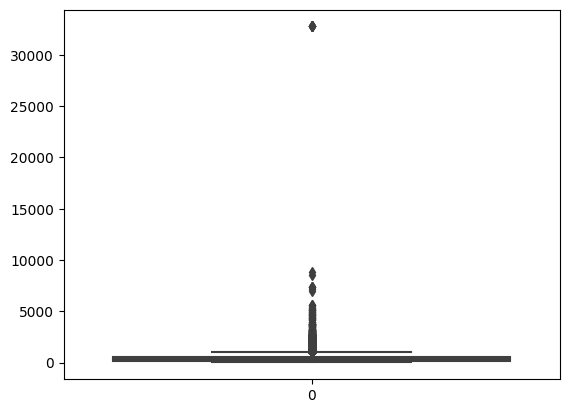

In [ ]:
import seaborn as sns 
sns.boxplot(train_data["protein_sequence_length"])

# **Trimming the protein sequence lengths to speed-up training**

The above box plot depicts the distribution of all protein sequence lengths. We can observe from the box-plot distribution that the data we were provided has varied sequence length (raning upto 30000 amino acids in a protein sequence).

However one could also notice that about 75% of all the protein sequence have length less than 2500 ( 3rd Quartille ) . So , the possible lengths upto which we can trime th sequence could be taken as 2048,1024 or 512 ( Powers of 2 ). For making the final dataset i used 1024 as the threshold for protein sequence length as , 

i) Choosing 2048 as sequence length for training , lead to a drastic increase in the time taken to train the neural network as we have a lot of fetures to work on.
ii) And on choosing 512 as sequence length , we only get to deal with about 21,000 protein sequences  , thus loosing out about 10,000 protein sequences from our training data

Here i trimmed of the protein sequences of length greater than 1024 , to speed up training . 

In [ ]:
train_data = train_data.loc[train_data['protein_sequence_length']<= 1024]

In [ ]:
train_data.shape

(27141, 27)

In [ ]:
train_data

,seq_id,protein_sequence,pH,data_source,tm,protein_sequence_length,n_distinct_acids,A,P,D,...,L,H,Y,Q,M,F,S,K,R,C
0,25,AAPDEITTAWPVNVGPLNPHLYTPNQMFAQSMVYEPLVKYQADGSV...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4,501,19,52,37,28,...,47,10,19,27,10,21,26,28,21,0
1,28,AARRFSGPRNQRQQGGGDPGLMHGKTVLITGANSGLGRATAAELLR...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4,313,20,25,12,12,...,42,7,7,12,5,13,20,12,24,7
2,29,AASSPEADFVKKTISSHKIVIFSKSYCPYCKKAKSVFRELDQVPYV...,7.0,doi.org/10.1038/s41592-020-0801-4,49.0,109,19,8,4,7,...,7,2,4,3,0,4,11,10,4,2
3,30,AATFAYSQSQKRSSSSPGGGSNHGWNNWGKAAALASTTPLVHVASV...,5.5,doi.org/10.1038/s41592-020-0801-4,55.6,329,20,24,17,25,...,25,7,15,11,5,19,23,25,11,1
4,33,AAVLVTFIGGLYFITHHKKEESETLQSQKVTGNGLPPKPEERWRYI...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4,278,20,29,21,6,...,18,4,3,42,4,5,14,15,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28976,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8,549,20,33,25,38,...,46,15,18,24,13,18,33,32,42,12
28977,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2,469,20,37,19,21,...,47,22,14,16,14,22,37,20,25,5
28978,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6,128,20,13,6,7,...,6,2,4,8,7,7,10,8,3,1
28979,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7,593,20,47,31,34,...,45,11,18,12,26,23,51,35,25,5


**iv)  Sequence in which amino acids occur in an enzyme :**
The first step is to basically add as many columns as maximum protein sequence length

In [ ]:
temp_df = pd.DataFrame(train_data['protein_sequence'].apply(list).tolist())

In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,A,A,P,D,E,I,T,T,A,W,...,None,None,None,None,None,None,None,None,None,None
1,A,A,R,R,F,S,G,P,R,N,...,None,None,None,None,None,None,None,None,None,None
2,A,A,S,S,P,E,A,D,F,V,...,None,None,None,None,None,None,None,None,None,None
3,A,A,T,F,A,Y,S,Q,S,Q,...,None,None,None,None,None,None,None,None,None,None
4,A,A,V,L,V,T,F,I,G,G,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27136,Y,Y,M,Y,S,G,G,G,S,A,...,None,None,None,None,None,None,None,None,None,None
27137,Y,Y,N,D,Q,H,R,L,S,S,...,None,None,None,None,None,None,None,None,None,None
27138,Y,Y,Q,R,T,L,G,A,E,L,...,None,None,None,None,None,None,None,None,None,None
27139,Y,Y,S,F,S,D,N,I,T,T,...,None,None,None,None,None,None,None,None,None,None


**Next we update values in these column with a integer map for all amino acids . We'd be having None values at all those locations in the protein sequence where 
we dont have a amino acid . So, first we assign a unique integer to each amni acid**

In [ ]:
amino_acid_dict = { j : i+1 for i,j in enumerate(train_data['protein_sequence'].str.split('').explode('protein_sequence').unique()[1:])}
amino_acid_dict

{'A': 1,
 'P': 2,
 'D': 3,
 'E': 4,
 'I': 5,
 'T': 6,
 'W': 7,
 'V': 8,
 'N': 9,
 'G': 10,
 'L': 11,
 'H': 12,
 'Y': 13,
 'Q': 14,
 'M': 15,
 'F': 16,
 'S': 17,
 'K': 18,
 'R': 19,
 'C': 20}

In [ ]:
temp_df = temp_df.replace(amino_acid_dict)

In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1,1,2,3,4,5.0,6.0,6.0,1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,19,19,16,17.0,10.0,2.0,19.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,17,17,2,4.0,1.0,3.0,16.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,6,16,1,13.0,17.0,14.0,17.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,8,11,8,6.0,16.0,5.0,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27136,13,13,15,13,17,10.0,10.0,10.0,17.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27137,13,13,9,3,14,12.0,19.0,11.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27138,13,13,14,19,6,11.0,10.0,1.0,4.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27139,13,13,17,16,17,3.0,9.0,5.0,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
temp_df = temp_df.fillna(0)

In [ ]:
temp_df.reset_index(inplace=True)
train_data.reset_index(inplace=True)

In [ ]:
data = pd.concat([train_data,temp_df], axis=1)

In [ ]:
data.drop(['index','protein_sequence','data_source'],axis=1, inplace=True)

In [ ]:
data.drop(['seq_id'],axis=1, inplace=True)

In [ ]:
data

,pH,tm,protein_sequence_length,n_distinct_acids,A,P,D,E,I,T,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,7.0,48.4,501,19,52,37,28,32,32,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,48.4,313,20,25,12,12,22,12,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,49.0,109,19,8,4,7,10,6,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.5,55.6,329,20,24,17,25,20,9,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,48.4,278,20,29,21,6,23,6,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27136,7.0,51.8,549,20,33,25,38,31,21,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27137,7.0,37.2,469,20,37,19,21,29,30,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27138,7.0,64.6,128,20,13,6,7,7,6,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27139,7.0,50.7,593,20,47,31,34,36,34,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Building the final train/validation dataset**

In [ ]:
import tensorflow as tf
x = data.drop(['tm'] , axis=1 )

In [ ]:
x = x.astype(float)

In [ ]:
x0 = x.drop(x.columns[0:23] , axis=1)
x1 = x[data.columns[4:24]]
x2 = data [["pH" , "protein_sequence_length" , "n_distinct_acids"]]
y = data["tm"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train_0, X_val_0, y_train_0, y_val_0 = train_test_split( x0 , y, test_size=0.1, random_state=42)
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split( x1 , y, test_size=0.1, random_state=42)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split( x2 , y, test_size=0.1, random_state=42)

In [ ]:
X_train_0

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
22287,15.0,17.0,6.0,18.0,18.0,18.0,2.0,11.0,6.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3402,15.0,1.0,19.0,8.0,11.0,11.0,8.0,4.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20081,15.0,17.0,10.0,16.0,13.0,12.0,18.0,12.0,16.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25040,15.0,8.0,17.0,17.0,4.0,2.0,18.0,10.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15943,15.0,9.0,2.0,6.0,14.0,18.0,2.0,4.0,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,15.0,17.0,19.0,19.0,19.0,1.0,12.0,3.0,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,15.0,3.0,6.0,20.0,16.0,16.0,20.0,10.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,15.0,1.0,1.0,19.0,11.0,11.0,19.0,8.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,15.0,9.0,11.0,2.0,6.0,1.0,14.0,4.0,8.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Building Tensorflow Model ( Building custom neeural network using Model subclassing )**

On analying the final dataset that was created for enyme stability prediction ,one could easily figure out that we deal with three different aspects of each protein sequence while we use it for training our model,


# **Architecture of initial neural network** 

**i)** **Sequence of amino acids in the protein sequence**
This part of the neural network has two bidirectional GRU layers to feed our neural network with both the protein suqence as well as the reverse of the protein seuqence as well. Moreover instead of using a regular dropout layer as our regularization layer , we use a SpatialDropout layer so that we drop entire feature maps instead of individual elements

We also have an embedding layer to embed our high dimensional dataset into a lower dimensional vector space.

**ii)** **Count of each each amino acid that occours in a protein sequence**

For training this part of the network we use a Dense neural network with 3 dense layers and a dropout layer 

**iii)** **Number of amino acids in the protein sequence , length of protein seqence and pH level**

For training this part of the network we use a Dense neural network with 2 dense layers and a dropout layer 


So , we first build a neural network which has three sub-networks for training the model on each of the aforthmentioned aspects and then finally concatenate all these layers for predicting the final output.

Batch normalization layer is used wheverever there could be a possible internal covariate shift in data ( Caused by change in the type of input layers distribution ) , so we have 4 batch normalization layers in total.








In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers


# **Final neural network architecture** 

In [ ]:
class enzyme_stability_prediction_model(tf.keras.Model):
    def __init__(self, amino_acids=21, max_sequence_length=1024):
        super(enzyme_stability_prediction_model,self).__init__()

        init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
        
        self.embedding_layer = layers.Embedding(amino_acids, 64 , input_length=max_sequence_length)
        self.dropout1 = layers.SpatialDropout1D(0.5)
        self.lstm1 = layers.LSTM(256 , activation="tanh" , return_sequences=True)
        self.dense0 = layers.Dense(32 ,activation = 'tanh')
        self.lstm2 = layers.LSTM(64 , activation="tanh")
        self.dense1 = layers.Dense(32 ,activation = 'tanh')
        self.batchnorm1 = layers.BatchNormalization()
     
        self.dense2 = layers.Dense(3,activation = 'selu', kernel_initializer=tf.keras.initializers.LecunNormal())
        self.dropout2 = layers.Dropout(0.5)
        self.dense3 = layers.Dense(8,activation = 'selu', kernel_initializer=tf.keras.initializers.LecunNormal())
        self.batchnorm_extra1 = layers.BatchNormalization()
        
        self.dense4 = layers.Dense(20 , activation = 'selu', kernel_initializer=tf.keras.initializers.LecunNormal())
        self.dropout3 = layers.Dropout(0.5)
        self.dense_extra = layers.Dense(16,activation = 'selu', kernel_initializer=tf.keras.initializers.LecunNormal())
        self.batchnorm6 = layers.BatchNormalization()
        
        self.concat1 = layers.Concatenate(axis=1)                   

        self.dense6 =  layers.Dense(32,activation = 'selu', kernel_initializer=tf.keras.initializers.LecunNormal())
        self.batchnorm4 = layers.BatchNormalization()
        self.dense7 = layers.Dense(16,activation = 'selu' , kernel_initializer=tf.keras.initializers.LecunNormal() , use_bias=False)
        
        self.regressor = layers.Dense(1 , activation='linear')

    def call(self, inputs, training=False):
          
        # Building Model for protein sequence
        x0 = self.embedding_layer(inputs[0])
        if training:
            x0 = self.dropout1(x0, training=training)
        x0 = self.lstm1(x0)
        x0 = self.dense0(x0)
        x0 = self.lstm2(x0)
        x0 = self.dense1(x0)
        x0 = self.batchnorm1(x0)

       # Building model for pH , protein_sequence_length , number of amino acids 
        x1 = self.dense2(inputs[1])
        if training:
            x1 = self.dropout2(x1, training=training)
        x1 = self.dense3(x1)
        x1 = self.batchnorm_extra1(x1)

       # Building model for figuring out the count of amino acids 
        x2 = self.dense4(inputs[2])
        if training:
            x2 = self.dropout3(x2, training=training)
        x2 = self.dense_extra(x2)
        x2 = self.batchnorm6(x2)
        
        x = self.concat1([x0,x1,x2])
        x = self.dense6(x)
        x = self.batchnorm4(x)
        x = self.dense7(x)
        
        return self.regressor(x)      

    def build_graph(self):
        # helper method for plotting architecture
        inputs = [
              layers.Input(shape=(1024,)),
              layers.Input(shape=(3,)),
              layers.Input(shape=(20,)) 
         ]
        return tf.keras.Model(
            inputs=inputs,
            outputs=self.call(inputs)
        )

In [ ]:
model = enzyme_stability_prediction_model()
model(
    [   layers.Input(shape=(1024,)),
        layers.Input(shape=(3,)),
        layers.Input(shape=(20,)) 
    ]
)

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'enzyme_stability_prediction_model_9')>

In [ ]:
exponential_decay  = tf.keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate=0.001,
                    decay_steps=100,
                    decay_rate=0.9)
scheduled_adam = tf.keras.optimizers.Adam(learning_rate=exponential_decay)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['mean_squared_error']
)

In [ ]:
from keras.utils import plot_model
plot_model(
    model.build_graph(),
    to_file='model.png', 
    dpi=64,  
    show_shapes=True, 
    show_layer_names=True,
    expand_nested=False
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
model.summary()

Model: "enzyme_stability_prediction_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1024, 64)          1344      
                                                                 
 spatial_dropout1d (SpatialD  multiple                 0 (unused)
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 1024, 64)          33024     
                                                                 
 lstm_1 (LSTM)               (None, 1024, 64)          33024     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 32)                1056      
                               

In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=25 ,  restore_best_weights=True)

# **Network architecture's 1st update**

Training the network with selu activations , Lecun Normal initialization and  kernel regularization in all three sub branches of our neural network for 25 epochs**

**As we can see we obtained a poor performance for the above model . So in order to have a better convergence I increased the batch size to 64 and number of epochs to 100 and adding one more batch normalization layer**

In [ ]:
history1 = model.fit(
    x = (X_train_0,X_train_2,X_train_1),
    y = y_train_0,
    validation_data=((X_val_0,X_val_2,X_val_1), y_val_0),
    batch_size=64,
    epochs=100,
    callbacks=[early_stop]
)

<AxesSubplot: >

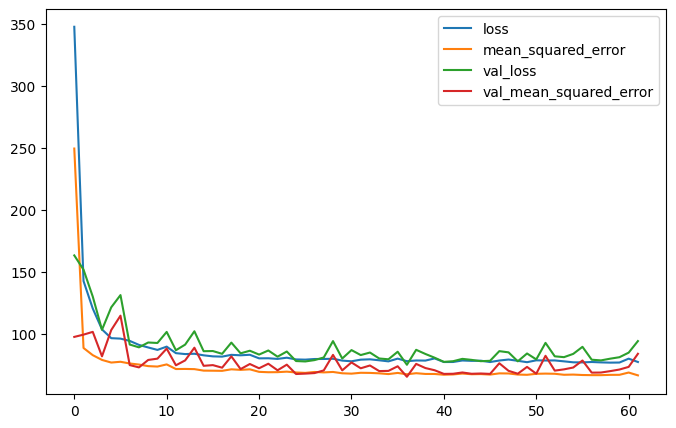

In [ ]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))	

# **Network architecture's 2nd update**
Decreasing the learning rate to 10^-3 and making the neural network more dense

In [ ]:
history2 = model.fit(
    x = (X_train_0,X_train_2,X_train_1),
    y = y_train_0,
    validation_data=((X_val_0,X_val_2,X_val_1), y_val_0),
    batch_size=64,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
355/355 [==============================] - 89s 249ms/step - loss: 2087.8723 - mean_squared_error: 1920.6392 - val_loss: 664.6476 - val_mean_squared_error: 562.6938
Epoch 2/100
355/355 [==============================] - 87s 245ms/step - loss: 508.2936 - mean_squared_error: 417.5258 - val_loss: 211.0010 - val_mean_squared_error: 128.5888
Epoch 3/100
355/355 [==============================] - 87s 244ms/step - loss: 175.5152 - mean_squared_error: 100.9246 - val_loss: 158.1319 - val_mean_squared_error: 90.8142
Epoch 4/100
355/355 [==============================] - 87s 244ms/step - loss: 148.3378 - mean_squared_error: 86.8925 - val_loss: 165.8672 - val_mean_squared_error: 108.0556
Epoch 5/100
355/355 [==============================] - 87s 244ms/step - loss: 135.8866 - mean_squared_error: 81.8614 - val_loss: 146.6657 - val_mean_squared_error: 95.8280
Epoch 6/100
355/355 [==============================] - 87s 244ms/step - loss: 126.4679 - mean_squared_error: 78.6997 - val_loss: 119

<AxesSubplot: >

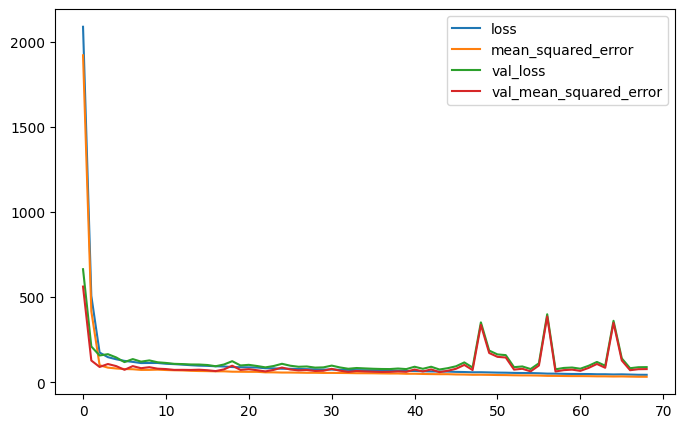

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))	

# **Network architecture's 3rd update**
 Keeping the learning rate and regularizations the same , i dropped some dense layers and added some dropout layers to avoid overfitting. Moreover, Instead of dropping the missing values like previous cases , i imputed them with the mean values of their columns**

In [ ]:
history3 = model.fit(
    x = (X_train_0,X_train_2,X_train_1),
    y = y_train_0,
    validation_data=((X_val_0,X_val_2,X_val_1), y_val_0),
    batch_size=64,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
402/402 [==============================] - 105s 247ms/step - loss: 693.1303 - mean_squared_error: 623.3098 - val_loss: 175.3624 - val_mean_squared_error: 122.1244
Epoch 2/100
402/402 [==============================] - 97s 242ms/step - loss: 177.9436 - mean_squared_error: 132.3879 - val_loss: 164.7808 - val_mean_squared_error: 124.0744
Epoch 3/100
402/402 [==============================] - 97s 242ms/step - loss: 159.3861 - mean_squared_error: 120.9669 - val_loss: 142.4970 - val_mean_squared_error: 106.1151
Epoch 4/100
402/402 [==============================] - 98s 243ms/step - loss: 151.9071 - mean_squared_error: 116.8936 - val_loss: 154.1944 - val_mean_squared_error: 120.3956
Epoch 5/100
402/402 [==============================] - 100s 248ms/step - loss: 145.2153 - mean_squared_error: 112.5998 - val_loss: 144.2883 - val_mean_squared_error: 112.6579
Epoch 6/100
402/402 [==============================] - 98s 244ms/step - loss: 140.5613 - mean_squared_error: 109.8009 - val_loss

# **Network architecture's final updates ( Update-4 to Update-10)**

# **Improvement in validation loss from -12% (i.e 112%) to 76%**

We then make final set of changes to structure of neural network . The major changes made can be summarized as follows,

i) Using LSTM layers instead of GRU layers ( Led to a slight improvement in model's accuracy )

ii) Removing bi-directional layers

iii) Reducing the dense layers and number of neurons after concatenation layer

iv) Reducing neurons in Sub branches

v) Adding and removing kernel regularization ( L1L2 regularization tested with L1=0.01,0.001,0.005,0.0001 , l2=0.01,0.001,0.005,0.0001)

vi) Changing embedding size and trying to use decaying learning rate 

**The neural network was traned with all the above changes and a few other minor changes using Adam optimier at a learning rate of 10^-3,10^-4,10^-2 with batch sizes of 32,64**

In [ ]:
history4 = model.fit(
    x = (X_train_0,X_train_2,X_train_1),
    y = y_train_0,
    validation_data=((X_val_0,X_val_2,X_val_1), y_val_0),
    batch_size=64,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
402/402 [==============================] - 105s 246ms/step - loss: 267.2831 - mean_squared_error: 227.8165 - val_loss: 209.9124 - val_mean_squared_error: 185.7857
Epoch 2/100
402/402 [==============================] - 97s 242ms/step - loss: 156.5051 - mean_squared_error: 136.5635 - val_loss: 1880.2501 - val_mean_squared_error: 1862.2899
Epoch 3/100
402/402 [==============================] - 97s 242ms/step - loss: 145.5238 - mean_squared_error: 128.8686 - val_loss: 134.3779 - val_mean_squared_error: 118.2324
Epoch 4/100
402/402 [==============================] - 98s 243ms/step - loss: 139.6851 - mean_squared_error: 124.8788 - val_loss: 128.0816 - val_mean_squared_error: 114.3205
Epoch 5/100
402/402 [==============================] - 97s 242ms/step - loss: 140.8709 - mean_squared_error: 126.0130 - val_loss: 138.6774 - val_mean_squared_error: 123.3122
Epoch 6/100
402/402 [==============================] - 97s 243ms/step - loss: 142.2855 - mean_squared_error: 126.5693 - val_los

In [ ]:
history5 = model.fit(
    x = (X_train_0,X_train_2,X_train_1),
    y = y_train_0,
    validation_data=((X_val_0,X_val_2,X_val_1), y_val_0),
    batch_size=64,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
402/402 [==============================] - 105s 245ms/step - loss: 2205.3933 - mean_squared_error: 2183.6445 - val_loss: 1430.6740 - val_mean_squared_error: 1420.4490
Epoch 2/100
402/402 [==============================] - 97s 242ms/step - loss: 789.3198 - mean_squared_error: 782.4968 - val_loss: 267.2155 - val_mean_squared_error: 262.2492
Epoch 3/100
402/402 [==============================] - 98s 243ms/step - loss: 171.2187 - mean_squared_error: 167.2377 - val_loss: 139.9879 - val_mean_squared_error: 136.8158
Epoch 4/100
402/402 [==============================] - 98s 243ms/step - loss: 125.6203 - mean_squared_error: 122.7611 - val_loss: 128.2536 - val_mean_squared_error: 125.8156
Epoch 5/100
402/402 [==============================] - 98s 244ms/step - loss: 120.8765 - mean_squared_error: 118.6459 - val_loss: 115.6221 - val_mean_squared_error: 113.5015
Epoch 6/100
402/402 [==============================] - 97s 242ms/step - loss: 116.8777 - mean_squared_error: 114.8877 - val_l

<AxesSubplot: >

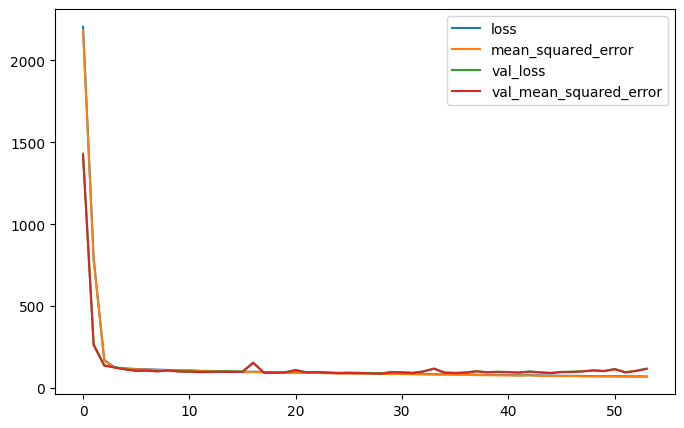

In [ ]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))	

In [ ]:
history6 = model.fit(
    x = (X_train_0,X_train_2,X_train_1),
    y = y_train_0,
    validation_data=((X_val_0,X_val_2,X_val_1), y_val_0),
    batch_size=64,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
402/402 [==============================] - 104s 244ms/step - loss: 523.0851 - mean_squared_error: 468.7556 - val_loss: 180.5227 - val_mean_squared_error: 140.2582
Epoch 2/100
402/402 [==============================] - 96s 240ms/step - loss: 155.0286 - mean_squared_error: 121.6741 - val_loss: 175.5927 - val_mean_squared_error: 146.9013
Epoch 3/100
402/402 [==============================] - 97s 241ms/step - loss: 137.9072 - mean_squared_error: 111.5937 - val_loss: 141.5998 - val_mean_squared_error: 117.4253
Epoch 4/100
402/402 [==============================] - 97s 241ms/step - loss: 130.1423 - mean_squared_error: 107.3049 - val_loss: 152.7661 - val_mean_squared_error: 131.2720
Epoch 5/100
402/402 [==============================] - 97s 241ms/step - loss: 125.0050 - mean_squared_error: 104.3665 - val_loss: 194.2747 - val_mean_squared_error: 174.6176
Epoch 6/100
402/402 [==============================] - 97s 241ms/step - loss: 120.5844 - mean_squared_error: 101.5144 - val_loss:

In [ ]:
history7 = model.fit(
    x = (X_train_0,X_train_2,X_train_1),
    y = y_train_0,
    validation_data=((X_val_0,X_val_2,X_val_1), y_val_0),
    batch_size=64,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
402/402 [==============================] - 106s 244ms/step - loss: 871.7040 - mean_squared_error: 871.7040 - val_loss: 805.4697 - val_mean_squared_error: 805.4697
Epoch 2/100
402/402 [==============================] - 97s 241ms/step - loss: 186.1931 - mean_squared_error: 186.1931 - val_loss: 445.5048 - val_mean_squared_error: 445.5048
Epoch 3/100
402/402 [==============================] - 97s 241ms/step - loss: 163.5130 - mean_squared_error: 163.5130 - val_loss: 278.2138 - val_mean_squared_error: 278.2138
Epoch 4/100
402/402 [==============================] - 97s 241ms/step - loss: 155.5101 - mean_squared_error: 155.5101 - val_loss: 260.6084 - val_mean_squared_error: 260.6084
Epoch 5/100
402/402 [==============================] - 97s 241ms/step - loss: 149.6352 - mean_squared_error: 149.6352 - val_loss: 143.7570 - val_mean_squared_error: 143.7570
Epoch 6/100
402/402 [==============================] - 99s 246ms/step - loss: 138.7301 - mean_squared_error: 138.7301 - val_loss:

<AxesSubplot: >

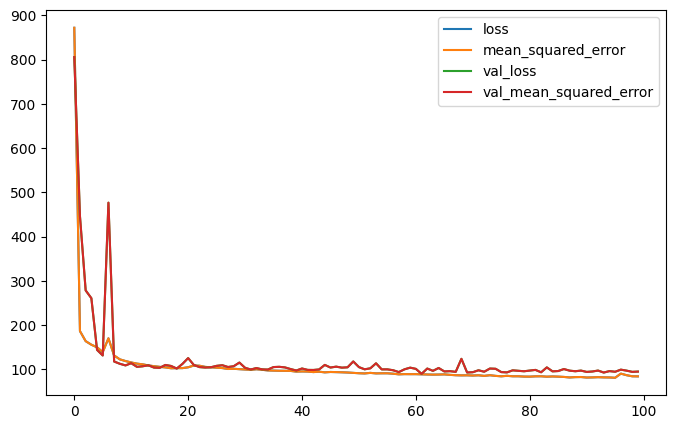

In [ ]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))	

In [ ]:
history8 = model.fit(
    x = (X_train_0,X_train_2,X_train_1),
    y = y_train_0,
    validation_data=((X_val_0,X_val_2,X_val_1), y_val_0),
    batch_size=64,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
402/402 [==============================] - 70s 165ms/step - loss: 422.1339 - mean_squared_error: 422.0600 - val_loss: 155.1385 - val_mean_squared_error: 155.0628
Epoch 2/100
402/402 [==============================] - 65s 162ms/step - loss: 152.8201 - mean_squared_error: 152.7435 - val_loss: 142.8185 - val_mean_squared_error: 142.7411
Epoch 3/100
402/402 [==============================] - 66s 163ms/step - loss: 141.2507 - mean_squared_error: 141.1725 - val_loss: 128.6759 - val_mean_squared_error: 128.5969
Epoch 4/100
402/402 [==============================] - 66s 164ms/step - loss: 136.9335 - mean_squared_error: 136.8538 - val_loss: 125.6184 - val_mean_squared_error: 125.5381
Epoch 5/100
402/402 [==============================] - 66s 165ms/step - loss: 132.6421 - mean_squared_error: 132.5613 - val_loss: 129.5266 - val_mean_squared_error: 129.4452
Epoch 6/100
402/402 [==============================] - 67s 166ms/step - loss: 130.8348 - mean_squared_error: 130.7526 - val_loss: 

<AxesSubplot: >

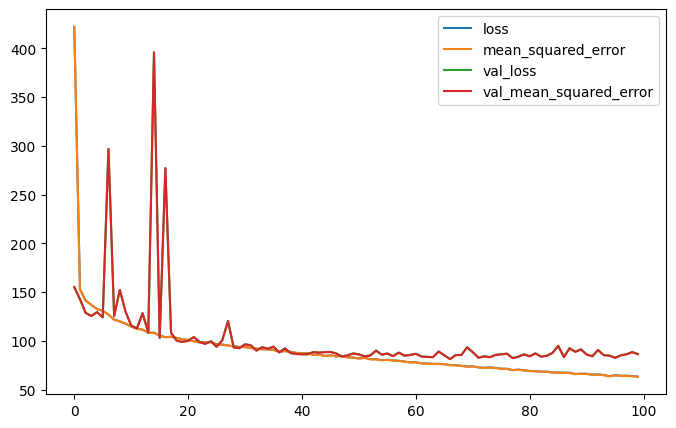

In [ ]:
pd.DataFrame(history8.history).plot(figsize=(8, 5))	

In [ ]:
history9 = model.fit(
    x = (X_train_0,X_train_2,X_train_1),
    y = y_train_0,
    validation_data=((X_val_0,X_val_2,X_val_1), y_val_0),
    batch_size=64,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
382/382 [==============================] - 109s 268ms/step - loss: 269.0523 - mean_squared_error: 268.9948 - val_loss: 237.2062 - val_mean_squared_error: 237.1481
Epoch 2/100
382/382 [==============================] - 102s 267ms/step - loss: 147.3421 - mean_squared_error: 147.2835 - val_loss: 121.4362 - val_mean_squared_error: 121.3770
Epoch 3/100
382/382 [==============================] - 103s 270ms/step - loss: 136.4557 - mean_squared_error: 136.3961 - val_loss: 184.4336 - val_mean_squared_error: 184.3734
Epoch 4/100
382/382 [==============================] - 104s 272ms/step - loss: 127.6732 - mean_squared_error: 127.6127 - val_loss: 265.7741 - val_mean_squared_error: 265.7130
Epoch 5/100
382/382 [==============================] - 104s 272ms/step - loss: 123.6693 - mean_squared_error: 123.6077 - val_loss: 124.5228 - val_mean_squared_error: 124.4608
Epoch 6/100
382/382 [==============================] - 104s 273ms/step - loss: 119.6187 - mean_squared_error: 119.5562 - val_

In [ ]:
history10 = model.fit(
    x = (X_train_0,X_train_2,X_train_1),
    y = y_train_0,
    validation_data=((X_val_0,X_val_2,X_val_1), y_val_0),
    batch_size=64,
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
382/382 [==============================] - 41s 106ms/step - loss: 82.7766 - mean_squared_error: 82.7725 - val_loss: 97.0301 - val_mean_squared_error: 97.0260
Epoch 2/100
382/382 [==============================] - 40s 106ms/step - loss: 81.7416 - mean_squared_error: 81.7374 - val_loss: 78.8479 - val_mean_squared_error: 78.8437
Epoch 3/100
382/382 [==============================] - 40s 105ms/step - loss: 81.3009 - mean_squared_error: 81.2967 - val_loss: 78.8599 - val_mean_squared_error: 78.8556
Epoch 4/100
382/382 [==============================] - 40s 106ms/step - loss: 81.4549 - mean_squared_error: 81.4507 - val_loss: 114.0782 - val_mean_squared_error: 114.0740
Epoch 5/100
382/382 [==============================] - 40s 106ms/step - loss: 81.4768 - mean_squared_error: 81.4726 - val_loss: 78.9554 - val_mean_squared_error: 78.9512
Epoch 6/100
382/382 [==============================] - 40s 106ms/step - loss: 80.3314 - mean_squared_error: 80.3271 - val_loss: 94.5372 - val_mean_s

In [ ]:
test_data = pd.read_csv("test.csv")
test_data['protein_sequence_length'] = test_data['protein_sequence'].str.len()
test_data['n_distinct_acids'] = test_data.apply(lambda x: len(set(x['protein_sequence'])), axis=1)
test_data.reset_index(inplace=True)


for amino_acid in test_data['protein_sequence'].str.split('').explode('protein_sequence').unique()[1:]:
        test_data[amino_acid] = test_data.apply(lambda x: x['protein_sequence'].count(amino_acid), axis=1)

temp_df = pd.DataFrame(test_data['protein_sequence'].apply(list).tolist())
amino_acid_dict = { j : i+1 for i,j in enumerate(test_data['protein_sequence'].str.split('').explode('protein_sequence').unique()[1:])}
temp_df = temp_df.replace(amino_acid_dict)


In [ ]:
for i in range(222,1025):
    data = [0]*2413
    temp_df[i]=data


C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\2209770639.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_df[i]=data
C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\2209770639.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_df[i]=data
C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\2209770639.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,1,2,1,3,2,4,2,5,6,7,...,0,0,0,0,0,0,0,0,0,0
1,1,2,1,3,2,4,2,5,6,7,...,0,0,0,0,0,0,0,0,0,0
2,1,2,1,3,2,4,2,5,6,7,...,0,0,0,0,0,0,0,0,0,0
3,1,2,1,3,2,4,2,5,6,7,...,0,0,0,0,0,0,0,0,0,0
4,1,2,1,3,2,4,2,5,6,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,1,2,1,3,2,4,2,5,6,7,...,0,0,0,0,0,0,0,0,0,0
2409,1,2,1,3,2,4,2,5,6,7,...,0,0,0,0,0,0,0,0,0,0
2410,1,2,1,3,2,4,2,5,6,7,...,0,0,0,0,0,0,0,0,0,0
2411,1,2,1,3,2,4,2,5,6,7,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data

,index,seq_id,protein_sequence,pH,data_source,protein_sequence_length,n_distinct_acids,V,P,N,...,Q,I,L,F,C,W,R,Y,H,M
0,0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,18,13,17,19,...,13,6,10,10,4,6,3,6,0,0
1,1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,18,13,17,19,...,13,6,10,10,4,6,3,6,0,0
2,2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes,220,18,13,17,19,...,13,6,10,10,4,6,3,6,0,0
3,3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,18,13,17,19,...,13,6,11,10,5,6,3,6,0,0
4,4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,18,13,17,19,...,13,6,11,11,4,6,3,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,18,13,17,19,...,13,7,11,10,4,6,3,6,0,0
2409,2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,18,13,17,19,...,13,6,12,10,4,6,3,6,0,0
2410,2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,18,13,17,20,...,13,6,11,10,4,6,3,6,0,0
2411,2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,221,18,13,18,19,...,13,6,11,10,4,6,3,6,0,0


In [ ]:

data_pred = pd.concat([test_data,temp_df], axis=1)
seq_id = data_pred["seq_id"]
data_pred.drop(['index','protein_sequence','data_source','seq_id'],axis=1, inplace=True)
data_pred = data_pred.astype(float)

In [ ]:
data_pred

,pH,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,8.0,1.0,1.0,2.0,3.0,4.0,5.0,6.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0,1.0,1.0,19.0,19.0,16.0,17.0,10.0,2.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,1.0,1.0,17.0,17.0,2.0,4.0,1.0,3.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,1.0,1.0,6.0,16.0,1.0,13.0,17.0,14.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,1.0,1.0,8.0,11.0,8.0,6.0,16.0,5.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27136,NaN,13.0,13.0,15.0,13.0,17.0,10.0,10.0,10.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27137,NaN,13.0,13.0,9.0,3.0,14.0,12.0,19.0,11.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27138,NaN,13.0,13.0,14.0,19.0,6.0,11.0,10.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27139,NaN,13.0,13.0,17.0,16.0,17.0,3.0,9.0,5.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_out = data_pred
x2_p = data_pred [["pH" , "protein_sequence_length" , "n_distinct_acids"]]
x0_p = x_out.drop(x_out.columns[0:23] , axis=1)
x1_p = x_out[data_pred.columns[4:24]]

In [ ]:
data_pred

,pH,protein_sequence_length,n_distinct_acids,V,P,N,E,D,A,T,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,8.0,221.0,18.0,13.0,17.0,19.0,8.0,15.0,22.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0,221.0,18.0,13.0,17.0,19.0,7.0,15.0,22.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,220.0,18.0,13.0,17.0,19.0,7.0,15.0,22.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,221.0,18.0,13.0,17.0,19.0,7.0,15.0,22.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,221.0,18.0,13.0,17.0,19.0,7.0,15.0,22.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,8.0,221.0,18.0,13.0,17.0,19.0,7.0,15.0,21.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2409,8.0,221.0,18.0,13.0,17.0,19.0,7.0,15.0,21.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2410,8.0,221.0,18.0,13.0,17.0,20.0,7.0,15.0,21.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2411,8.0,221.0,18.0,13.0,18.0,19.0,7.0,15.0,21.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
output = model.predict( (x0_p,x2_p,x1_p))

76/76 [==============================] - 3s 30ms/step


In [ ]:
len(output)

2413

In [ ]:

kaggle_submission  = pd.DataFrame(
    {"seq_id": seq_id, "tm": output.T[0]}
)


In [ ]:
kaggle_submission

,seq_id,tm
0,31390,62.970623
1,31391,62.845978
2,31392,62.729675
3,31393,61.672787
4,31394,62.105972
...,...,...
2408,33798,61.476185
2409,33799,61.334187
2410,33800,61.521156
2411,33801,61.799244


In [ ]:
kaggle_submission.to_csv('kaggle_novozyme_submission.csv', index=False)

In [ ]:
os.getcwd()

'c:\\Users\\DELL\\Downloads'

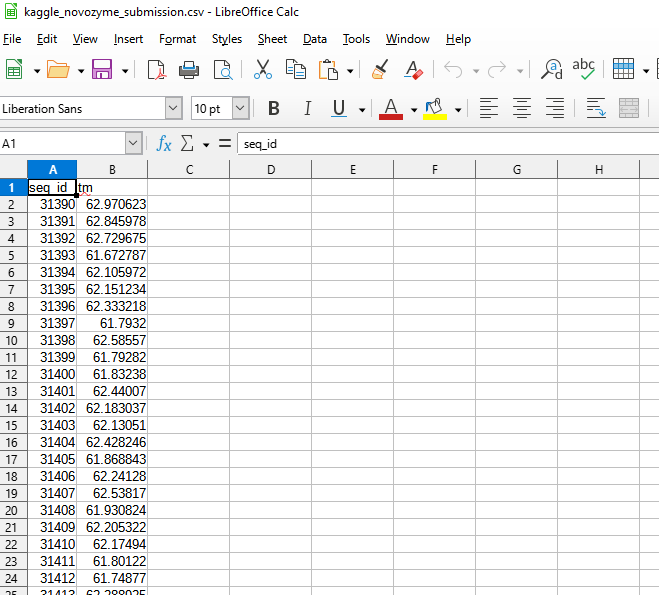